# Scott Breitbach
## 14-Feb-2021
## DSC540, Weeks 9-10

# 1. Activity 9: Extracting the Top 100 eBooks from Gutenberg

## 1) Import the necessary libraries, including **regex** and **beautifulsoup**.

In [ ]:
import re
import requests
from bs4 import BeautifulSoup
import urllib.request, urllib.parse, urllib.error
import ssl

## 2) Check the SSL certificate.

In [ ]:
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

## 3) Read the HTML from the URL.

In [3]:
url = "https://www.gutenberg.org/browse/scores/top"
response = requests.get(url)

## 4) Write a small function to check the status of the web request.

In [4]:
def statusCheck(resp):
    if resp.status_code==200:
        print('Web request successful!')
        return 1
    else:
        print('Web request failed.')
        return -1

## 5) Decode the response and pass this on to BeautifulSoup for HTML parsing.

In [5]:
def decodeResponse(resp):
    def decodeContent(r, encoding):
        return(r.content.decode(encoding))
    
    def encodingCheck(r):
        return (r.encoding)
    
    status = statusCheck(resp)
    
    if status==1:
        contents = decodeContent(response, encodingCheck(response))
        return contents
    else:
        print("Sorry, could not reach the web page!")
        return -1
    
contents = decodeResponse(response)

Web request successful!


In [6]:
soup = BeautifulSoup(contents, 'html.parser')

## 6) Find all the **href** tags and store them in the list of links. Check what the list looks like - print the first 30 elements.

In [7]:
soup.find_all('li')[31].a.get('href')

'/ebooks/1342'

Find all the **href** tags and store them in the list of links:

In [8]:
listOfLinks = []
for link in soup.find_all('li'):
    lnk = link.a.get('href')
    listOfLinks.append(lnk)
#     print(lnk)
len(listOfLinks)

672

Check what the list looks like - print the first 30 elements:

In [9]:
listOfLinks[:30]

['/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7',
 '#authors-last7',
 '#books-last30']

In [10]:
# print(soup.text[1000:1500])

A bit more, to see where the book links start:

In [11]:
listOfLinks[30:40]

['#authors-last30',
 '/ebooks/1342',
 '/ebooks/84',
 '/ebooks/46',
 '/ebooks/11',
 '/ebooks/6133',
 '/ebooks/43',
 '/ebooks/1080',
 '/ebooks/64317',
 '/ebooks/1661']

## 7) Use a regular expression to find the numeric digits in these links. These are the file numbers for the top 100 eBooks.

In [12]:
listOfLinks[31]

'/ebooks/1342'

Use a regular expression to find the numeric digits in these links:

In [13]:
pattern = r"/ebooks/[0-9]"
prog = re.compile(r'[0-9]*$')

In [14]:
# prog.search(listOfLinks[31]).group()

These are the file numbers for the top 100 eBooks:

In [15]:
i=0
for link in listOfLinks:
    if re.match(pattern, link):
#         print(link)
        print(prog.search(link).group())
    # Stop after 20 iterations, to keep this short
        i += 1
        if i >= 20:
            break

1342
84
46
11
6133
43
1080
64317
1661
25344
98
2701
2542
1260
174
1952
5200
16
844
1232


## 8) Initialize the empty list to hold the file numbers over an appropriate range and use **regex** to find the numeric digits in the link **href** string. Use the `.findall()` method.

Initialize the empty list to hold the file numbers over an appropriate range:

In [16]:
bookNums = []

Use regex to find the numeric digits in the link href string. Use the findall method:

In [17]:
for link in listOfLinks:
    if re.match(pattern, link):
        digits = re.findall('[0-9]+', link)[0]
        bookNums.append(int(digits))

In [18]:
print("Top 100 books, by file number:")
print(bookNums)

Top 100 books, by file number:
[1342, 84, 46, 11, 6133, 43, 1080, 64317, 1661, 25344, 98, 2701, 2542, 1260, 174, 1952, 5200, 16, 844, 1232, 120, 2852, 219, 1400, 205, 76, 345, 74, 16328, 25929, 64323, 4014, 514, 23, 1250, 408, 2591, 2097, 1497, 45, 158, 160, 4300, 2600, 55, 64316, 215, 64320, 1184, 58585, 244, 19942, 3825, 36, 2814, 768, 3207, 64319, 57426, 2554, 140, 113, 730, 135, 5740, 34901, 996, 42108, 2500, 64321, 863, 1727, 1934, 8102, 766, 236, 35, 35899, 64318, 3600, 1998, 376, 64326, 829, 1001, 902, 203, 521, 147, 41, 32854, 15399, 60479, 64314, 30254, 3300, 43453, 209, 37134, 61, 84, 1342, 46, 6133, 11, 1080, 25344, 43, 98, 1661, 2701, 2542, 5200, 1250, 1952, 1260, 57426, 844, 76, 174, 219, 23, 205, 74, 345, 19942, 16328, 1400, 4014, 1232, 2852, 160, 25929, 120, 16, 55, 514, 2591, 215, 4300, 1497, 2814, 158, 45, 2600, 408, 1184, 2097, 36, 3825, 60479, 2554, 58585, 768, 50040, 244, 135, 3207, 730, 35, 1998, 2500, 1727, 113, 996, 5740, 140, 203, 902, 42108, 3600, 1001, 863, 23

## 9) What does the **soup** object's text look like? 
Use the `.text` method and print the first 2,000 characters:

In [19]:
# soup.text[:2000]
print(soup.text[:2000].replace('\n\n', ''))  # Saving space by removing multiple newlines

Top 100 | Project GutenbergMenu▾About
          ▾▾
About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of UseSearch and Browse
      	  ▾▾
Book Search
Bookshelves
Frequently Downloaded
Offline CatalogsHelp
          ▾▾
All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →
Donate
DonationFrequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.Downloaded Books
2021-01-18186142
last 7 days1294928
last 30 days4934605Top 100 EBooks yesterday
Top 100 Authors yesterday
Top 100 EBooks last 7 days
Top 100 Authors last 7 day

## 10) Search in the extracted text (using regex) from the soup object to find the names of the top 100 eBooks (yesterday's ranking).

In [20]:
soup.find_all('li')[31].a.get('href')

'/ebooks/1342'

In [21]:
len(soup.find_all('ol'))

6

In [22]:
topHundy = soup.find_all('ol')[0]

In [23]:
len(topHundy.find_all('li'))

100

In [24]:
topHundy.find_all('li')[0]

<li><a href="/ebooks/1342">Pride and Prejudice by Jane Austen (2514)</a></li>

In [25]:
topHundy.find_all('li')[0].text

'Pride and Prejudice by Jane Austen (2514)'

In [26]:
i=0
for book in topHundy.find_all('li'):
    print(book.text)
# Stop after 20 iterations, to keep this short
    i += 1
    if i >= 20:
        break

Pride and Prejudice by Jane Austen (2514)
Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (2346)
A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens (2119)
Alice's Adventures in Wonderland by Lewis Carroll (1205)
Arsène Lupin, gentleman-cambrioleur. English by Maurice Leblanc (1172)
The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson (1116)
A Modest Proposal by Jonathan Swift (968)
The Great Gatsby by F. Scott  Fitzgerald (946)
The Adventures of Sherlock Holmes by Arthur Conan Doyle (892)
The Scarlet Letter by Nathaniel Hawthorne (867)
A Tale of Two Cities by Charles Dickens (843)
Moby Dick; Or, The Whale by Herman Melville (811)
Et dukkehjem. English by Henrik Ibsen (761)
Jane Eyre: An Autobiography by Charlotte Brontë (733)
The Picture of Dorian Gray by Oscar Wilde (718)
The Yellow Wallpaper by Charlotte Perkins Gilman (713)
Metamorphosis by Franz Kafka (677)
Peter Pan by J. M.  Barrie (650)
The Importance of Being 

## 11) Create a starting index. It should point to the text *Top 100 EBooks yesterday*. Use the `.splitlines()` method of soup.text. It splits the lines of text of the soup object.

In [27]:
# soup.text.find("Top 100 EBooks yesterday")

In [28]:
# soup.text.splitlines()

In [29]:
soup.text.splitlines().index("Top 100 EBooks yesterday")

113

In [30]:
soup.text.splitlines()[113]

'Top 100 EBooks yesterday'

In [31]:
startInd = soup.text.splitlines().index("Top 100 EBooks yesterday")

In [32]:
soup.text.splitlines()[startInd:startInd+15]

['Top 100 EBooks yesterday',
 'Top 100 Authors yesterday',
 'Top 100 EBooks last 7 days',
 'Top 100 Authors last 7 days',
 'Top 100 EBooks last 30 days',
 'Top 100 Authors last 30 days',
 '',
 '',
 'Top 100 EBooks yesterday',
 '',
 'Pride and Prejudice by Jane Austen (2514)',
 'Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (2346)',
 'A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens (2119)',
 "Alice's Adventures in Wonderland by Lewis Carroll (1205)",
 'Arsène Lupin, gentleman-cambrioleur. English by Maurice Leblanc (1172)']

Looks like there's more than one instance of "Top 100 EBooks yesterday".

In [33]:
soup.text.splitlines()[startInd+8]

'Top 100 EBooks yesterday'

Add a couple more to get to the first book:

In [34]:
startInd = soup.text.splitlines().index("Top 100 EBooks yesterday")+10

## 12) Loop 0-100 to add the strings of the next 100 lines to this temporary list. Hint: use the `.splitlines()` method.

In [35]:
topBooks = []
for book in soup.text.splitlines()[startInd:startInd+100]:
    topBooks.append(book)

In [36]:
topBooks[:5], topBooks[-5:]

(['Pride and Prejudice by Jane Austen (2514)',
  'Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (2346)',
  'A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens (2119)',
  "Alice's Adventures in Wonderland by Lewis Carroll (1205)",
  'Arsène Lupin, gentleman-cambrioleur. English by Maurice Leblanc (1172)'],
 ['An Inquiry into the Nature and Causes of the Wealth of Nations by Adam Smith (207)',
  'A Pickle for the Knowing Ones by Timothy Dexter (203)',
  'The Turn of the Screw by Henry James (201)',
  'The Elements of Style by William Strunk (196)',
  'Manifest der Kommunistischen Partei. English by Friedrich Engels and Karl Marx (196)'])

## 13) Use a regular expression to extract only the text from the name strings and append it to an empty list. Use `.match()` and `.span()` to find the indices and use them.

In [37]:
topBooks[0]

'Pride and Prejudice by Jane Austen (2514)'

In [38]:
prog = re.compile(r'\s\([0-9]{1,5}\)')
prog.search(topBooks[0]).group()

' (2514)'

In [39]:
prog.match(topBooks[0], pos=len(topBooks[0])-len(prog.search(topBooks[0]).group()))

<re.Match object; span=(34, 41), match=' (2514)'>

In [40]:
prog.match(topBooks[0], pos=len(topBooks[0])-len(prog.search(topBooks[0]).group())).span()

(34, 41)

In [41]:
topBooks[0][:34]

'Pride and Prejudice by Jane Austen'

In [42]:
bookTitles = []

for book in topBooks:
    s, e = prog.match(book, pos=len(book)-len(prog.search(book).group())).span()
#     print(book[:s])
    bookTitles.append(book[:s])

In [43]:
len(bookTitles)

100

In [44]:
bookTitles[:5], bookTitles[-5:]

(['Pride and Prejudice by Jane Austen',
  'Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley',
  'A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens',
  "Alice's Adventures in Wonderland by Lewis Carroll",
  'Arsène Lupin, gentleman-cambrioleur. English by Maurice Leblanc'],
 ['An Inquiry into the Nature and Causes of the Wealth of Nations by Adam Smith',
  'A Pickle for the Knowing Ones by Timothy Dexter',
  'The Turn of the Screw by Henry James',
  'The Elements of Style by William Strunk',
  'Manifest der Kommunistischen Partei. English by Friedrich Engels and Karl Marx'])

# 2. Activity 10: Building Your Own Movie Database by Reading an API

## 1) Import **urllib.request**, **urllib.parse**, **urllib.error**, and **json**.

In [121]:
import urllib.request, urllib.parse, urllib.error
import json
import os
from IPython.display import Image, display

## 2) Load the secret API key from a JSON file stored in the same folder in a variable, by using `json.load()`.

## 3) *(2a)* Obtain a key and store it in JSON as **APIkeys.json**.
Done!

## 4) *(2b)* Open the **APIkeys.json** file.

In [106]:
with open('APIkey.json') as f:
    key = json.load(f)['OMDBapi']    

# 5) Assign the OMDB portal as a string to a variable.
(http://www.omdbapi.com/?)

In [107]:
omdbPortal = "http://www.omdbapi.com/?"

## 6) Create a variable called **apikey** with the last portion of the URL (**&apikey=secretapikey**), where **secretapikey** is your own API key.
The movie name portion i.e. "t=movie_name" will be addressed later

In [108]:
apiKey = "&apikey="+key

## 7) Write a utility function called **print_json** to print the movie data from a JSON file (which we will get from the portal).

In [109]:
def print_json(movieData):
    """
    Function to print movie data from a JSON file.
    """
    data = json.loads(movieData)
    for k, v, in data.items():
        print("{}:\n   {}".format(k, v))

In [110]:
def fetchMovieData(movieTitle):
    """
    Function to retrieve JSON data for a specified 
    movie from the "http://www.omdbapi.com/?" API.
    """
    urlTitle = urllib.parse.urlencode({'t': str(movieTitle)})
    url = omdbPortal + urlTitle + apiKey
    
    try:
        uh = urllib.request.urlopen(url)
    except HTTPError as e:
        print("So sorry, but we could not retreive anything on {}"
              .format(movieTitle))
        return None
    except URLError as e:
        print('Failed to reach a server. You know how it is.')
        print("Reason: {}".format(e.reason))
        return None
    else:
        data = uh.read().decode()
        print("Retrieved data on {}. Total {} characters read."
             .format(movieTitle, len(data)))
        return data

In [124]:
# movieTitle = "Titanic"
movieTitle = str(input("Enter the name of a movie: "))
movieData = fetchMovieData(movieTitle)

Enter the name of a movie:  Shawshank Redemption


Retrieved data on Shawshank Redemption. Total 1082 characters read.


In [125]:
print_json(movieData)

Title:
   The Shawshank Redemption
Year:
   1994
Rated:
   R
Released:
   14 Oct 1994
Runtime:
   142 min
Genre:
   Drama
Director:
   Frank Darabont
Writer:
   Stephen King (short story "Rita Hayworth and Shawshank Redemption"), Frank Darabont (screenplay)
Actors:
   Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler
Plot:
   Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.
Language:
   English
Country:
   USA
Awards:
   Nominated for 7 Oscars. Another 21 wins & 36 nominations.
Poster:
   https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:
   [{'Source': 'Internet Movie Database', 'Value': '9.3/10'}, {'Source': 'Rotten Tomatoes', 'Value': '91%'}, {'Source': 'Metacritic', 'Value': '80/100'}]
Metascore:
   80
imdbRating:
   9.3
imdbVotes:
   2,338,688
imdbID:
   tt0111161
Type:
   movie
DVD:
   N/A
BoxOffice:
   $28,699,976
Pr

## 8) Write a utility function to download a poster of the movie based on the information from the JSON dataset and save it in your local folder.
Use the **os** module. The poster data is stored in the JSON key **Poster**. Use the Python command to open a file and write the poster data. Close the file after you're done. This functon will save the poster data as an image file.

In [122]:
def posterTime(movieData):
    """
    This function retrieves, saves, and displays
    the poster image for the searched movie.
    """
    movieJSON = json.loads(movieData)
    
    # Grab movie Title and Poster data:
    movie = movieJSON['Title']
    poster = movieJSON['Poster']
    imgData = urllib.request.urlopen(poster).read()
    
    # Generate file info and save image:
    extension = movieJSON['Poster'].split('.')[-1]
    fileName = "{}.{}".format(str(movie), extension)
    try:
        with open(fileName, 'wb') as f:
            f.write(imgData)
        print('The following {} image was saved as:\n\t"{}"'
              .format(extension.upper(), fileName))
        display(Image(filename=fileName))
    except:
        print("Something went wrong. Image could not be saved.")

The following JPG image was saved as:
	"The Shawshank Redemption.jpg"


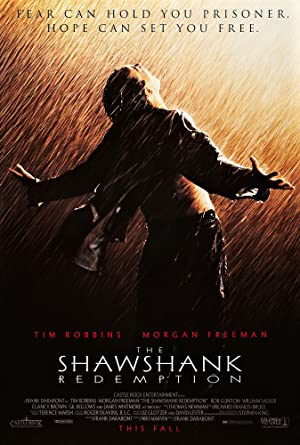

In [126]:
posterTime(movieData)

# 3. Connect to the Twitter API and do a simple data pull.

In [57]:
import requests
import os
import json

## a.-g. Set up a Twitter developer account and obtain necessary keys/tokens.

In [58]:
os.environ["CONSUMER_KEY"] = "<API key>"
os.environ["CONSUMER_SECRET"] = "<API secret key>"
os.environ["BEARER_TOKEN"] = "<Bearer token>"

Donezo.

## h. Connect to the Twitter API to pull data searching for "Bellevue University" and "Data Science" or something else interesting.
* [How to Create a Twitter App and API Interface via Python](https://www.sitepoint.com/how-to-create-a-twitter-app-and-api-interface-via-python/)
* [Welcome Python-Twitter's Documentation!](https://python-twitter.readthedocs.io/en/latest/)

In [142]:
def twitterSearch(searchTerms):
    """
    Takes search term, generates a URL, and reaches out to Twitter API
    """
    # Load token:
    bearerToken = os.environ.get("BEARER_TOKEN")
    
    # Generate URL:
    query = f"{searchTerms} -is:retweet lang:en"
    tweetFields = "expansions=author_id"
    url = f"https://api.twitter.com/2/tweets/search/recent?query={query}&{tweetFields}"
    
    # Establish headers and connect to endpoint:
    headers = {"Authorization": f"Bearer {bearerToken}"}
    response = requests.request("GET", url, headers=headers)
    print("Status:", response.status_code)
    if response.status_code !=200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [143]:
def printTweets(response):
    print(f"\nHERE'S THE TOP 10 TWEETS FOR '{search}':\n")
    i=0
    for tweet in response['data']:
        i+=1
        print('-'*20)
        print(f"\033[1m#{i}:\033[0m")
        print(tweet['text'])

In [141]:
search = str(input("Enter your Twitter search term(s):"))
tweets = twitterSearch(search)
printTweets(tweets)

Enter your Twitter search term(s): Data Science


200

HERE'S THE TOP 10 TWEETS FOR 'Data Science':

--------------------
#1:
Can @A2schools reopen safely? Absolutely - masking, distancing,⬇️class size, cohorting, improving ventilation... Community rates continuing to⬇️and lowest in &gt; 3 months. If we follow science, overwhelming data/evidence favors. Transmission in classrooms doesn't happen with above. https://t.co/vs9kgySpZE
--------------------
#2:
@LBMcGrath @heatherfro @KWaldenPhD @RichardJeanSo @Ted_Underwood @cwellmon Thanks all for sharing @KWaldenPhD @heatherfro @LBMcGrath. Points well taken. 

But I think it goes beyond debates over methods or disciplines. My implicit question was: how many non-white people have been hired into data science-inflected humanities positions?
--------------------
#3:
@justin_hart Data and science all in one chart.
--------------------
#4:
Constipation constipation for Ohio and being data science with the United States fart and we pill with this should have no ederess of the world. Nobody know

# 4. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete.  
a) Line  
b) Scatter  
c) Bar  
d) Histogram  
e) Density Plot  
f) Pie Chart  
You are free to use Matplotlib, Seaborn or another package if you prefer.

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
plt.rc('figure', figsize=(10, 6))

### Load cleaned candy data from previous week:

In [145]:
candyDF = pd.read_csv('candy_cleaned.csv')

## Scatter Plot

Add an Hour column for hour of the day:

In [147]:
candyDF['Hour'] = pd.to_datetime(candyDF.Timestamp).dt.hour

Plot Age against hour of the day to see if older people tend to be early risers and younger people night owls:

[Text(0.5, 0, 'Hour of Day'), Text(0, 0.5, 'Age')]

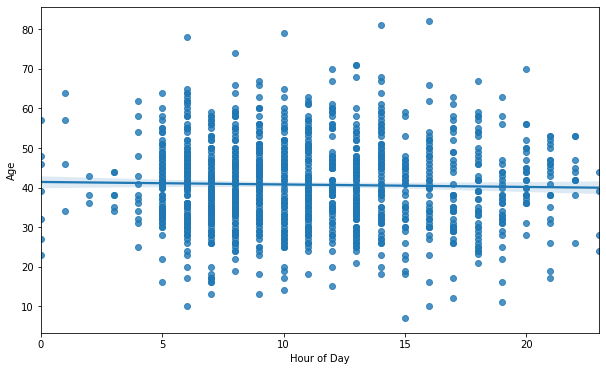

In [150]:
plot = sns.regplot(x='Hour', y='Age', data=candyDF)
plot.set(xlabel="Hour of Day", ylabel='Age')

Not really. That line appears pretty flat.